<a href="https://colab.research.google.com/github/Sari275/my-machine-learning-projects/blob/main/Sari_Elian's_Project_2_Assignment_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

You will implement logistic regression classifier.

Iris dataset with only 2 classes is provided to test the code.


In [1]:
import numpy as np
import pandas as pd
import numpy.matlib
import matplotlib.pyplot as plt

# read dataset
df = pd.read_csv("shuffled_2class_iris_dataset.csv")
print(df.head())

df = df.values
X = df[:,0:4]   # 100x4
y = df[:,4]     # 100x1

# Zero out the mean
diff = X.max(0) - X.min(0)
X = X - diff

# Create 90/10 trainig/test sets
train_data = X[0:90,0:4]; train_label = y[0:90]
test_data = X[90:100,0:4]; test_label = y[90:100]

   sepal_width  sepal_length  petal_width  petal_length  class
0          5.6           3.0          4.1           1.3      0
1          5.4           3.9          1.7           0.4      1
2          5.6           3.0          4.5           1.5      0
3          5.0           3.5          1.6           0.6      1
4          5.5           2.4          3.7           1.0      0


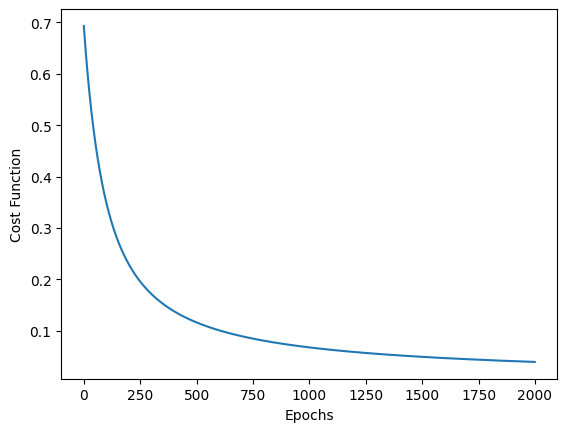

In [2]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def cost_function(h, y):
    return (-y * np.log(h) - (1-y) * np.log(1-h)).mean()

def train(X, y, learning_rate, epochs):
    m, n = X.shape
    weights = np.zeros(n)
    bias = 0
    costs = []

    for i in range(epochs):
        z = np.dot(X, weights) + bias
        h = sigmoid(z)
        gradient = np.dot(X.T, (h-y)) / m
        weights -= learning_rate * gradient
        bias -= learning_rate * np.mean(h-y)

        cost = cost_function(h, y)
        costs.append(cost)

    return weights, bias, costs

weights, bias, costs = train(train_data, train_label, 0.01, 2000)

plt.plot(range(len(costs)), costs)
plt.xlabel("Epochs")
plt.ylabel("Cost Function")
plt.show()


In [3]:
def predict(X, weights, bias):
    z = np.dot(X, weights) + bias
    h = sigmoid(z)
    y_prediction = np.round(h)
    return y_prediction

y_prediction = predict(test_data, weights, bias)

print("y:", test_label)
print("y_hat:", y_prediction)

accuracy = (test_label == y_prediction).mean()*100
print(f"Accuracy: {accuracy}%")


y: [1. 1. 0. 1. 0. 1. 0. 0. 0. 1.]
y_hat: [1. 1. 0. 1. 0. 1. 0. 0. 0. 1.]
Accuracy: 100.0%
